In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, plot_roc_curve

pd.set_option('display.max_rows',None)


Bad key "text.kerning_factor" on line 4 in
/Users/fabrizio/anaconda3/envs/DATA/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
df0 = pd.read_csv('SynthDataChurnQ1.csv')
df0.head()

,Dates,AccountID,Churn,accounts,startdate,size,industry,tenure,enddate,Tenure
0,2021-01-01 00:00:00,80304,Active,80304,2020-11-05 18:09:01,Small,Manufacturing,349,2021-10-20 18:09:01,56
1,2021-01-01 00:00:00,47675,Active,47675,2020-05-04 05:22:26,Large,Manufacturing,373,2021-05-12 05:22:26,241
2,2021-01-01 00:00:00,3021,Active,3021,2020-12-01 07:31:51,Small,Military,360,2021-11-26 07:31:51,30
3,2021-01-01 00:00:00,28499,Active,28499,2020-05-02 03:51:04,Small,PublicSector,365,2021-05-02 03:51:04,243
4,2021-01-01 00:00:00,77346,Active,77346,2020-04-12 23:23:53,Large,Manufacturing,353,2021-03-31 23:23:53,263


In [3]:
df0['Churn'].value_counts()

Active    17005
Churn      1948
Name: Churn, dtype: int64

#### Balance the classes

In [4]:
a = df0[df0['Churn']=='Churn']
b = df0[df0['Churn']=='Active'].sample(2053)
df = pd.concat([a,b])
df.head()

,Dates,AccountID,Churn,accounts,startdate,size,industry,tenure,enddate,Tenure
15,2021-01-01 00:00:00,302,Churn,302,2020-05-15 08:16:53,Small,Manufacturing,231,2021-01-01 08:16:53,230
23,2021-01-01 00:00:00,46396,Churn,46396,2020-03-18 10:36:53,Small,PublicSector,290,2021-01-02 10:36:53,288
25,2021-01-01 00:00:00,72560,Churn,72560,2020-04-28 20:33:25,Small,Manufacturing,269,2021-01-22 20:33:25,247
30,2021-01-01 00:00:00,56985,Churn,56985,2020-05-02 17:12:33,Small,Military,270,2021-01-27 17:12:33,243
38,2021-01-01 00:00:00,38040,Churn,38040,2019-10-11 18:00:18,Small,Construction,451,2021-01-04 18:00:18,447


In [5]:
df = pd.get_dummies(data = df, columns = ['size','industry'], drop_first=True)
#df = pd.concat([df.drop(columns=['size','industry']),dummies], axis=1)
df.head()

,Dates,AccountID,Churn,accounts,startdate,tenure,enddate,Tenure,size_Small,industry_Manufacturing,industry_Military,industry_Other,industry_PublicSector
15,2021-01-01 00:00:00,302,Churn,302,2020-05-15 08:16:53,231,2021-01-01 08:16:53,230,1,1,0,0,0
23,2021-01-01 00:00:00,46396,Churn,46396,2020-03-18 10:36:53,290,2021-01-02 10:36:53,288,1,0,0,0,1
25,2021-01-01 00:00:00,72560,Churn,72560,2020-04-28 20:33:25,269,2021-01-22 20:33:25,247,1,1,0,0,0
30,2021-01-01 00:00:00,56985,Churn,56985,2020-05-02 17:12:33,270,2021-01-27 17:12:33,243,1,0,1,0,0
38,2021-01-01 00:00:00,38040,Churn,38040,2019-10-11 18:00:18,451,2021-01-04 18:00:18,447,1,0,0,0,0


#### Divide in train and test sample

In [6]:
base = df[['Tenure','size_Small','industry_Manufacturing','industry_Military', 'industry_Other','industry_PublicSector']]
X_train, X_test, y_train, y_test = train_test_split(base, df['Churn'], test_size=0.33)

In [7]:
model = LogisticRegression()
model.fit(X_train,y_train)

/Users/fabrizio/anaconda3/envs/DATA/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [8]:
prediction = model.predict(X_test)
predicted_proba = model.predict_proba(X_test)[:,1]

In [9]:
y_train.value_counts()

Active    1356
Churn     1324
Name: Churn, dtype: int64

In [10]:
out = X_test.copy()
out['y_test'] = y_test
out['Prediction'] = prediction
out['Predicted_proba'] = predicted_proba

In [11]:
out

,Tenure,size_Small,industry_Manufacturing,industry_Military,industry_Other,industry_PublicSector,y_test,Prediction,Predicted_proba
2927,328,0,0,0,0,1,Active,Churn,0.536166
1378,282,1,0,1,0,0,Active,Churn,0.618955
18802,552,0,0,0,0,1,Churn,Churn,0.910356
15752,195,0,0,0,0,1,Churn,Active,0.241341
11653,273,1,0,0,0,1,Churn,Churn,0.628833
14065,205,1,0,0,0,1,Churn,Active,0.466931
1452,150,1,1,0,0,0,Churn,Active,0.394810
16534,248,1,0,0,0,1,Active,Churn,0.570694
3900,12,1,0,0,0,0,Active,Active,0.158061
11773,299,1,0,0,0,1,Active,Churn,0.685560


(0, 500)

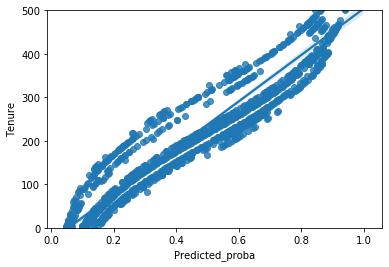

In [12]:
sns.regplot(x='Predicted_proba', y='Tenure', data=out)
plt.ylim([0,500])

In [13]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

      Active       0.76      0.70      0.73       697
       Churn       0.69      0.75      0.72       624

    accuracy                           0.73      1321
   macro avg       0.73      0.73      0.73      1321
weighted avg       0.73      0.73      0.73      1321



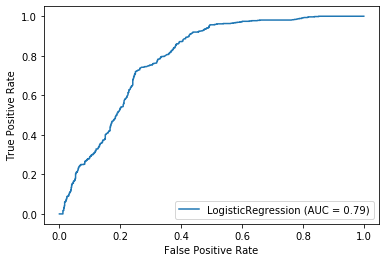

In [14]:
plot_roc_curve(model, X_test, y_test) 

In [18]:
# save model as a pickle
from joblib import dump, load
dump(model, 'LogisticRegressionSynthChurnData.joblib') 

['LogisticRegressionSynthChurnData.joblib']